# Miles Per Gallon: Scikit-Learn
Here, we'll try to use scikit-learn to see if we can predict the MPG of my car in 2016 based on the values for 2014 and 2015.

In [1]:
# Import the modules
import matplotlib.pyplot as plt
import numpy             as np
import pandas            as pd
import sklearn           as sk

## Preping the data
First thing we need to do is to get the inputs into the appropriate format. For this, we will use the correlation information that we found before:
* Year
* Week of year

We wont use the shifted week values, because we want to stick as closely as possible to the original data format as possible for simplicity sake.

In [18]:
# Load the data
db = pd.read_pickle('data/data_formatted.pkl')

# Extract the year and week number
db['Year'] = [date.year for date in db.Date]
db['Week'] = [date.weekofyear for date in db.Date]
db = db.drop(['Date','Price/Gal', 'Car MPG', 'paid ($)', 'Price/Barrel', 'Longitude', 'Latitude', 'Car gas', 'notes'], axis=1)
print(db.describe())
db = db.dropna(subset=['Miles', 'Real MPG'])

# Print column information
db.describe()

Miles  Gas Pumped     Avg Spd    Real MPG         Year        Week
count  111.000000  116.000000  115.000000  110.000000   116.000000  116.000000
mean   472.171171   13.783509   49.837391   34.343764  2015.094828   26.129310
std     37.997637    0.483713    5.380349    2.612735     0.903890   16.137739
min    383.000000   11.387000   34.500000   27.720000  2013.000000    1.000000
25%    448.250000   13.499000   46.900000   32.464250  2014.000000   11.000000
50%    473.800000   13.753500   49.400000   34.368500  2015.000000   27.000000
75%    505.200000   14.092500   51.800000   36.410000  2016.000000   40.250000
max    540.800000   14.862000   68.600000   39.665000  2017.000000   53.000000


,Miles,Gas Pumped,Avg Spd,Real MPG,Year,Week
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,472.226364,13.752591,49.547273,34.343764,2015.063636,25.900000
std,38.167070,0.466273,5.227428,2.612735,0.911469,16.413214
min,383.000000,11.387000,34.500000,27.720000,2013.000000,1.000000
25%,447.925000,13.483250,46.825000,32.464250,2014.000000,10.250000
50%,474.300000,13.746500,49.200000,34.368500,2015.000000,27.000000
75%,505.450000,14.081500,51.675000,36.410000,2016.000000,40.750000
max,540.800000,14.677000,68.600000,39.665000,2017.000000,53.000000


In [19]:
# Extract training and testing samples
train = db[(db.Year >= 2014) & (db.Year <= 2015)]
test  = db[(db.Year == 2016)]

# Split out the features (x) and true values (y)
train_x = train.drop(['Real MPG','Year'], axis=1)
train_y = train['Real MPG']
test_x  = test.drop(['Real MPG','Year'], axis=1)
test_y  = test['Real MPG']

print(train_x.describe())
print(train_x.dtypes)

Miles  Gas Pumped    Avg Spd       Week
count   71.000000   71.000000  71.000000  71.000000
mean   483.564789   13.706310  50.135211  27.408451
std     36.190946    0.396638   5.349075  15.745818
min    392.800000   12.476000  36.400000   1.000000
25%    463.450000   13.443000  47.550000  13.500000
50%    487.900000   13.651000  49.700000  28.000000
75%    513.300000   14.026500  52.450000  41.500000
max    535.500000   14.481000  68.600000  53.000000
Miles         float64
Gas Pumped    float64
Avg Spd       float64
Week            int64
dtype: object


Now comes the machine learning part! Let's put it into a [random forest regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor). Because the desired output is a continuous value, I'm using a regression formula here.

In [20]:
# Import the random forest regressor from scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics  import mean_absolute_error

# Construct the model and run the fit
model = RandomForestRegressor(random_state=1, n_estimators=100, criterion='mae')
model.fit(train_x, train_y)

# Make some predictions form our test data
mpg_preds = model.predict(test_x)
print(f'Mean absolute error: {mean_absolute_error(test_y, mpg_preds)} mpg')

Mean absolute error: 0.8007290909090822 mpg


## Visualizing the predictions
So it looks like we can predict the MPG to within +/- 0.8 MPG. That's pretty fantastic! So what does this look like?

Text(0, 0.5, 'Prediction MPG')

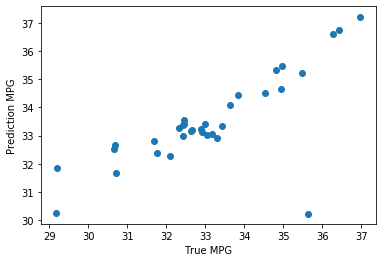

In [23]:
plt.scatter(test_y, mpg_preds)
plt.xlabel('True MPG')
plt.ylabel('Prediction MPG')

And just for kicks let's plot the prediction and true values over time